In [243]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **INFORME DE DATOS INICIALES**

In [244]:
Localidad = pd.read_csv("..\Datasets\Localidades.csv",delimiter = ',',encoding = "utf-8")
Cliente = pd.read_csv("..\Datasets\Clientes.csv",encoding = "utf-8",delimiter = ';', usecols=["ID","Provincia","Nombre_y_Apellido","Domicilio","Telefono","Edad","Localidad","X","Y","col10"])
Proveedor = pd.read_csv("..\Datasets\Proveedores.csv",delimiter = ',',encoding = "ansi")
Gasto = pd.read_csv("..\Datasets\Gasto.csv",delimiter = ',',encoding = "utf-8")
Compra = pd.read_csv("..\Datasets\Compra.csv",delimiter = ',',encoding = "utf-8")
Sucursal = pd.read_csv("..\Datasets\Sucursales.csv",delimiter = ';',encoding = "utf-8")
Venta = pd.read_csv("..\Datasets\Venta.csv",delimiter = ',',encoding = "utf-8")

In [245]:
def DetectaNulos(df,plot=True,rotation=45,figsize=(10,5),*kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0])*100)
        #Make a dataframe
        missings=pd.DataFrame({'Columna':labels,'Val_nulos':values,'PorcentVacio':percent}).sort_values(by='PorcentVacio',ascending=False)
        
        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Columna,y=round(missings.PorcentVacio, 2), palette = "YlOrBr")
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Columna',size=18)
            plt.ylabel('Porcent',size=18)
            plot.set_title('Porcent valores nulos',size=18)
            return missings
    else:
            return False

In [246]:
def CalidadDatosColumna(data, campo):
    Q1 = data[campo].quantile(0.25)
    Q3 = data[campo].quantile(0.75)
    
    #Se calcula el rango intercuartilico IQR.
    IQR = Q3 -Q1
    outliersSup = (Q3 + (1.5 * IQR)) 
    mask = data[campo]<outliersSup
    valoresinout = data[mask]
    valoressinerrores = valoresinout.shape[0]
    valoresnulos=data[campo].isnull().sum()
    outliers = data.shape[0]-valoresnulos-valoressinerrores
    
    #porcentajes para graficar
    porcentaje_outliers = round((outliers * 100)/data.shape[0], 2)
    porcentaje_datos_correctos = round((valoressinerrores * 100)/data.shape[0], 2)
    porcentaje_datos_nulos = round((valoresnulos * 100)/data.shape[0], 2)
    
    #Se cargan los datos para graficar
    datos = ['Sin Errores' ,'Nulos','Outliers'] 
    porcentaje = [porcentaje_datos_correctos,porcentaje_datos_nulos,porcentaje_outliers] 
    df = pd.DataFrame({"Datos": datos, 
                    "Porcentaje": porcentaje}) 
    
    #Se grafica.
    plot = sns.barplot(x='Datos', y="Porcentaje", data=df, palette = "YlOrBr")
    for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
    plot.set_title(f"Calidad De Los Datos de {campo}", fontsize = 16)
    plt.show()
    plt.show()
    print('El porcentaje de datos correctos en la columna', campo, 'es de: %{:.2f}'.format(porcentaje_datos_correctos))
    print('El porcentaje de datos nulos en la columna', campo, 'es de: %{:.2f}'.format(porcentaje_datos_nulos))
    print('El porcentaje de outliers en la columna', campo, 'es de: %{:.2f}'.format(porcentaje_outliers))

    print('Todos los valores por encima de', outliersSup, 'son un outlier')

### **TABLA VENTA**
Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdVenta | IdVenta | int64 | Clave de identificacion de venta |
| 1 | Fecha | Fecha | datetime64 | Fecha de la venta  |
| 2 | Fecha_Entrega | Fecha_Entrega | datetime64 | Fecha de entrega de la venta |
| 3 | IdCanal | IdCanal | int64 | Clave única del canal de venta |
| 4 | IdCliente | IdCliente | int64 | Clave única del cliente |
| 5 | IdSucursal | IdSucursal | int64 | Clave única de la sucursal |
| 6 | IdEmpleado | IdEmpleado | int64 | Clave única del empleado |
| 7 | IdProducto | IdProducto | int64 | Clave única del producto de la venta|
| 8 | Precio | Precio | float64 | Precio total de la venta  |
| 9 | Cantidad | Cantidad | float64 | Cantidad de producto de la venta  |




In [247]:
Venta.head(1)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0


In [248]:
print('La tabla Venta tiene el siguiente formato:', Venta.shape)

La tabla Venta tiene el siguiente formato: (46180, 10)


In [249]:
total_nulos = Venta.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla venta es de', nulos(total_nulos))

El total de valores nulos de la tabla venta es de 1804


,Columna,Val_nulos,PorcentVacio
0,Precio,920,1.992204
1,Cantidad,884,1.914249


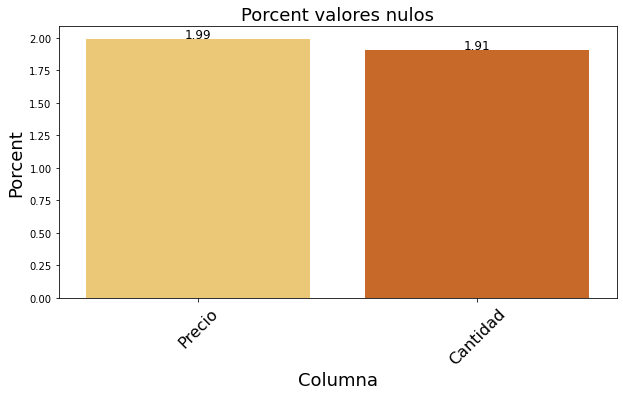

In [250]:
DetectaNulos(Venta)

BUSQUEDA DE OUTLIERS COLUMNA PRECIO


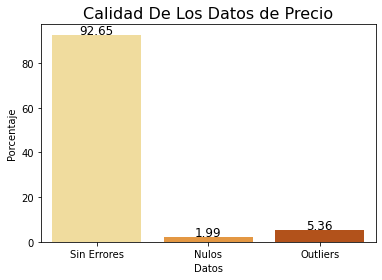

El porcentaje de datos correctos en la columna Precio es de: %92.65
El porcentaje de datos nulos en la columna Precio es de: %1.99
El porcentaje de outliers en la columna Precio es de: %5.36
Todos los valores por encima de 3815.5 son un outlier


In [251]:
CalidadDatosColumna(Venta,'Precio')

BUSQUEDA DE OUTLIERS COLUMNA CANTIDAD


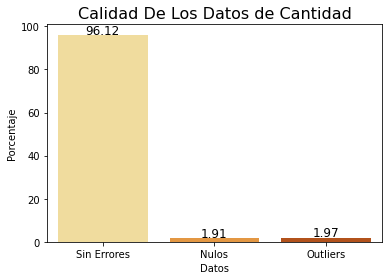

El porcentaje de datos correctos en la columna Cantidad es de: %96.12
El porcentaje de datos nulos en la columna Cantidad es de: %1.91
El porcentaje de outliers en la columna Cantidad es de: %1.97
Todos los valores por encima de 4.5 son un outlier


In [252]:
CalidadDatosColumna(Venta, 'Cantidad')

## TABLA CLIENTE
Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCliente | ID | int64 | Clave única del cliente |
| 1 | Nombre_y_Apellido | Nombre_y_Apellido | object | Nombre y apellido del cliente |
| 2 | Edad | Edad | int64 | Edad del cliente |
| 3 | Telefono | Telefono | object | Teléfono del cliente |
| 4 | Domicilio | Domicilio | object | Domicilio del cliente |
| 5 | Provincia | Provincia | object | Provincia del cliente |
| 6 | Localidad | Localidad | object | Localidad del cliente |
| 7 | Latitud | X | float64 | Latitud del domicilio del cliente |
| 8 | Longitud | Y | float64 | Longitud del domicilio del cliente |

In [253]:
print('La tabla Cliente tiene el siguiente formato', Cliente.shape)

La tabla Cliente tiene el siguiente formato (2384, 10)


In [254]:
Cliente.head(1)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN


In [255]:
total_nulos = Cliente.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla Cliente es de', nulos(total_nulos))

El total de valores nulos de la tabla Cliente es de 2633


,Columna,Val_nulos,PorcentVacio
7,col10,2384,100.000000
5,X,54,2.265101
6,Y,52,2.181208
2,Domicilio,43,1.803691
3,Telefono,31,1.300336
0,Provincia,25,1.048658
4,Localidad,25,1.048658
1,Nombre_y_Apellido,19,0.796980


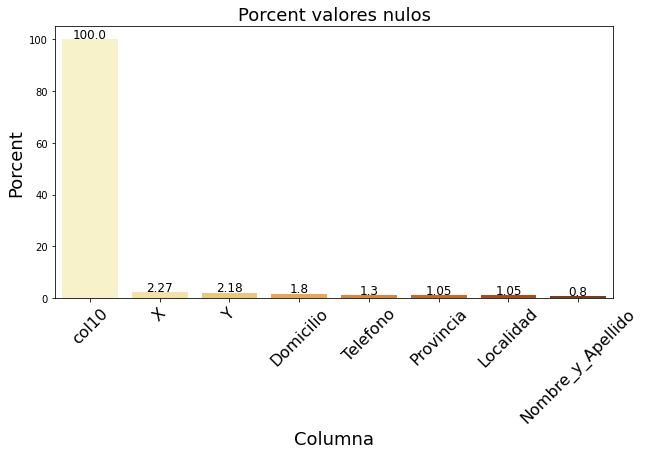

In [256]:
DetectaNulos(Cliente)

DETECTO NULOS DROPEANDO COLUMNA 10 PARA TENER MAS CLARIDAD DE LOS DATOS

,Columna,Val_nulos,PorcentVacio
5,X,54,2.265101
6,Y,52,2.181208
2,Domicilio,43,1.803691
3,Telefono,31,1.300336
0,Provincia,25,1.048658
4,Localidad,25,1.048658
1,Nombre_y_Apellido,19,0.796980


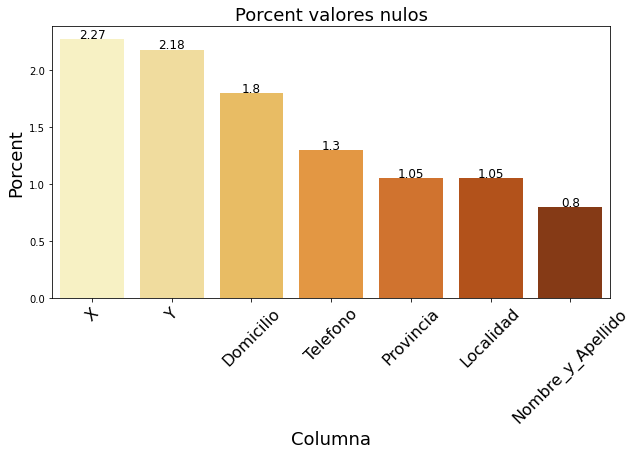

In [257]:
DetectaNulos(Cliente.drop(columns='col10'))

## TABLA SUCURSAL
DIRECCION
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdSucursal | ï»¿ID | int64 | Clave única dela sucursal |
| 1 | Sucursal | Sucursal | object | Nombre de la sucursal |
| 2 | Domicilio | Direccion | object | Domicilio de la sucursal |
| 3 | Localidad | Localidad | object | Localidad de la sucursal |
| 4 | Provincia | Provincia | object | Provincia de la sucursal |
| 5 | Latitud | Latitud | float64 | Latitud de la sucursal |
| 6 | Longitud | Longitud | float64 | Longitud de la sucursal |

In [258]:
print('La tabla sucursal tiene el siguiente formato', Sucursal.shape)

La tabla sucursal tiene el siguiente formato (31, 7)


In [259]:
Sucursal.head(1)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"


In [260]:
total_nulos = Sucursal.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla sucursal es de', nulos(total_nulos))

El total de valores nulos de la tabla sucursal es de 0


In [261]:
DetectaNulos(Sucursal)

False

La tabla sucursal no tiene valores nulos, por lo que no se va a graficar

## TABLA PROVEEDOR

| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdProveedor | IDProveedor | int64 | Clave única del proveedor |
| 1 | Proveedor | Nombre | object | Nombre del proveedor |
| 2 | Domicilio | Address | object | Domicilio del proveedor |
| 3 | Ciudad | City | object | Ciudad del proveedor |
| 4 | Provincia | State | object | Provincia del proveedor |
| 5 | Pais | Country | object | Pais del proveedor |
| 6 | Departamento | departamen | object | Departamento del proveedor |

In [262]:
print('La tabla proveedor tiene el siguiente formato', Proveedor.shape)

La tabla proveedor tiene el siguiente formato (14, 7)


In [263]:
Proveedor.head(1)

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA


In [264]:
total_nulos = Proveedor.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla proveedor es de', nulos(total_nulos))

El total de valores nulos de la tabla proveedor es de 2


,Columna,Val_nulos,PorcentVacio
0,Nombre,2,14.285714


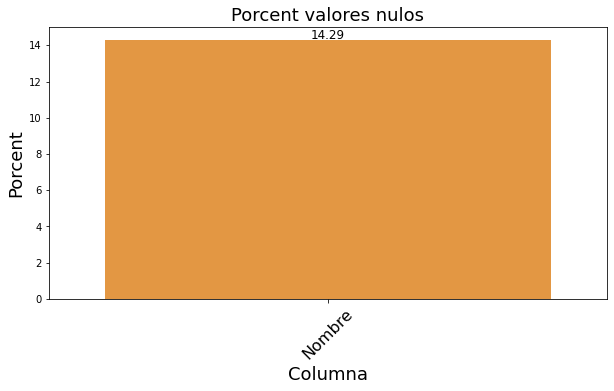

In [265]:
DetectaNulos(Proveedor)

## TABLA LOCALIDAD
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdLocalidad | id | int64 | Clave única de la localidad |
| 1 | Localidad | nombre | object | Nombre de la localidad |
| 2 | IdMunicipio | municipio_id | int64 | Clave única del municipio |
| 3 | Municipio | municipio_nombre | object | Nombre del municipio |
| 4 | IdDepartamento | departamento_id | int64 | Clave única del departamento |
| 5 | Departamento | departamento_nombre | object | Nombre del departamento |
| 6 | IdProvincia | provincia_id | int64 | Clave única de la provincia |
| 7 | Provincia | provincia_nombre | object | Nombre de la provincia |
| 8 | Fuente | fuente | object | Fuente de información de datos censales |
| 9 | IdLocalidadCensal | localidad_censal_id | int64 | Clave única de la localidad censal  |
| 10 | LocalidadCensal | localidad_censal_nombre | object | Nombre de la localidad censal |
| 11 | Categoria | categoria | object | Categoria de la localidad censal |
| 12 | Latitud | centroide_lat | float64 | Latitud de la localidad |
| 13 | Longitud | centroide_lon | float64 | Longitud de la localidad |

In [266]:
print('La tabla localidad tiene el siguiente formato', Localidad.shape)

La tabla localidad tiene el siguiente formato (4142, 14)


In [267]:
Localidad.head(1)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.28062,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires


In [268]:
total_nulos = Localidad.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla localidad es de', nulos(total_nulos))

El total de valores nulos de la tabla localidad es de 1039


,Columna,Val_nulos,PorcentVacio
2,municipio_id,543,13.109609
3,municipio_nombre,494,11.926606
0,departamento_id,1,0.024143
1,departamento_nombre,1,0.024143


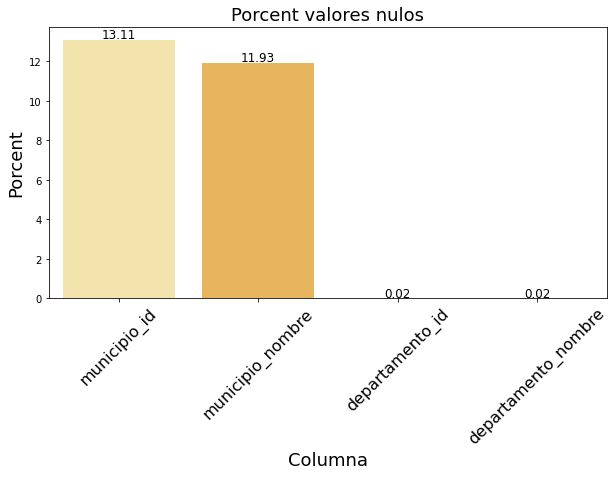

In [269]:
DetectaNulos(Localidad)

## TABLA GASTO
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdGasto | IdGasto | int64 | Clave única del gasto |
| 1 | IdSucursal | IdSucursal | int64 | Clave única de la sucursal |
| 2 | IdTipoGasto | IdTipoGasto | int64 | Clave única del tipo de gasto |
| 3 | Fecha | Fecha | datetime64 | Fecha registrada del gasto |
| 4 | Monto | Monto | float64 | Monto total del gasto |

In [270]:
print('La tabla gasto tiene el siguiente formato', Gasto.shape)

La tabla gasto tiene el siguiente formato (8640, 5)


In [271]:
Gasto.head(1)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.9


In [272]:
total_nulos = Gasto.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulo de la tabla Gasto es de', nulos(total_nulos))

El total de valores nulo de la tabla Gasto es de 0


BUSQUEDA DE OUTLIERS EN COLUMNA MONTO

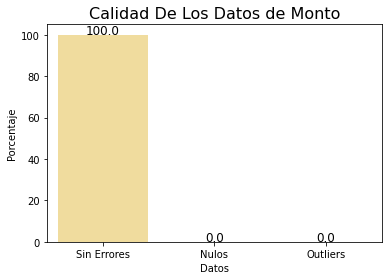

El porcentaje de datos correctos en la columna Monto es de: %100.00
El porcentaje de datos nulos en la columna Monto es de: %0.00
El porcentaje de outliers en la columna Monto es de: %0.00
Todos los valores por encima de 2368.7725 son un outlier


In [273]:
CalidadDatosColumna(Gasto, 'Monto')

## TABLA COMPRA
DICCIONARIO
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCompra | IdCompra | int64 | Clave única de la compra |
| 1 | Fecha | Fecha | datetime64 | Fecha registrada de compra |
| 2 | Fecha_Año | Fecha_Año | int64 | Año registrado de compra |
| 3 | Fecha_Mes | Fecha_Mes | int64 | Mes registrado de compra |
| 4 | Fecha_Periodo | Fecha_Periodo | int64 | Periodo registrado de compra  |
| 5 | IdProducto | IdProducto | int64 | Clave única del producto adquirido |
| 6 | Cantidad | Cantidad | int64 | Cantidad de producto adquirido en la compra |
| 7 | Precio | Precio | float64 | Precio pagado por la compra |
| 8 | IdProveedor | IdProveedor | int64 | Clave única del proveedor |

In [274]:
print('La tabla compra tiene el siguiente formato', Compra.shape)

La tabla compra tiene el siguiente formato (11539, 9)


In [275]:
Compra.head(1)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12


In [276]:
total_nulos = Compra.isnull().sum().sort_values(ascending = False)
def nulos(nulo):
    nul=0
    for i in range(0,len(nulo)-1):
     if nulo[i] >= 0:
         nul+= nulo[i]
    return nul
print('El total de valores nulos de la tabla Compra es de', nulos(total_nulos))

El total de valores nulos de la tabla Compra es de 367


,Columna,Val_nulos,PorcentVacio
0,Precio,367,3.180518


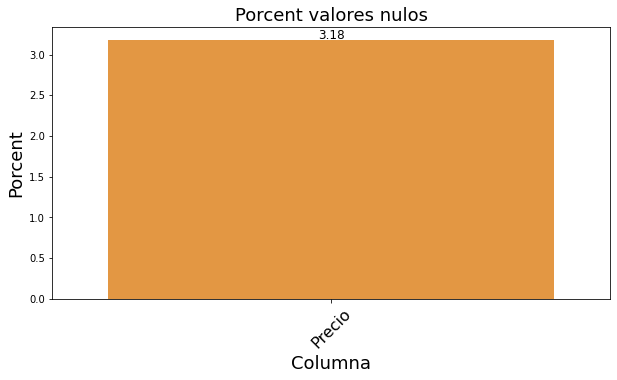

In [277]:
DetectaNulos(Compra)

BUSQUEDA DE OUTLIERS COLUMNA PRECIO

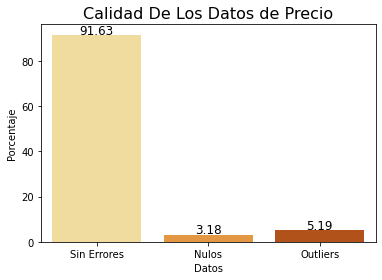

El porcentaje de datos correctos en la columna Precio es de: %91.63
El porcentaje de datos nulos en la columna Precio es de: %3.18
El porcentaje de outliers en la columna Precio es de: %5.19
Todos los valores por encima de 2690.5612499999997 son un outlier


In [278]:
CalidadDatosColumna(Compra,'Precio')

BUSQUEDA DE OUTLIERS COLUMNA CANTIDAD

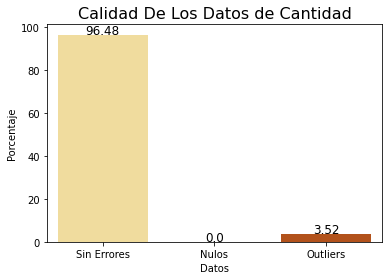

El porcentaje de datos correctos en la columna Cantidad es de: %96.48
El porcentaje de datos nulos en la columna Cantidad es de: %0.00
El porcentaje de outliers en la columna Cantidad es de: %3.52
Todos los valores por encima de 24.0 son un outlier


In [279]:
CalidadDatosColumna(Compra,'Cantidad')

## CONCLUSION DATOS

En el analisis inicial se ve que la integridad de los datos de las tablas Gasto y Sucursal son del 100% ya que no tienen nulos, seguidas por Proveedor con 2 nulos.  
En las tablas de Venta y Compra se encontraron outliers en las columnas Precio y Cantidad, valores a corregir para no tener resultados erroneos al momento de calcular ventas o compras por periodos.


# **ANALISIS DE NUEVA SUCURSAL Y KPI**

Como se ve en el siguiente dashboard de PowerBi un KPI que podria aplicar la empresa es el de Venta Total por Sucursales, donde la sucursal de Flores se muestra como la que mas ha vendido historicamente con un total de 7.246.983 en un total de 6502 unidades vendidas.  
Podria agregarse a este KPI los periodos de venta por Año o Trimestre para saber como esta siendo el rendimiento en ventas de las distintas sucursales en estos periodos de tiempo.  


La Cantidad Vendida por Sucursal es un buen KPI para saber cual de las sucursales es la que mas cantidades de producto vende. 


Clientes por Provincia seria un buen KPI para saber en que localidad hay muchos clientes de la empresa y asi analizar la posibilidad de aperturas de nuevas sucursales  
Al analizar esto nos da como resultado que Cordoba es la segunda provincia con mas cantidad de ventas detras de Buenos Aires y solo tiene 3 sucursales, asique seria un buen punto para la apertura de otra sucursal.

![](PowerBi1.png)

![](PowerBi2.png)